In [61]:
import keras
from keras.datasets import cifar10
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, BatchNormalization

In [62]:
import cv2
import numpy as np
import pandas as pd
import os, shutil, random, glob
import matplotlib.pyplot as plt
# os.environ["CUDA_VISIBLE_DEVICES"] = "2"
# CUDA_VISIBLE_DEVICES = 2

In [66]:
# pre-process file names (add labels to file names)
import os

path = "./dataset/female/"

for fileName in os.listdir(path):
    if '_female' not in fileName:
        os.rename(path + fileName, path + fileName.replace(".jpg", "_female.jpg"))

i=0
for fileName in os.listdir(path):
    i += 1
    if i % 10 == 0:
        print(fileName)

#######################################################################    

path = "./dataset/male/"

for fileName in os.listdir(path):
    if '_male' not in fileName:
        os.rename(path + fileName, path + fileName.replace(".jpg", "_male.jpg"))

j=0
for fileName in os.listdir(path):
    j += 1
    if j % 10 == 0:
        print(fileName)


main_000067_000001_female.jpg
main_000172_000001_female.jpg
main_000184_000001_female.jpg
main_000199_000001_female.jpg
main_000211_000000_female.jpg
main_000223_000003_female.jpg
main_000231_000000_female.jpg
main_000235_000002_female.jpg
main_000240_000000_female.jpg
main_000250_000000_female.jpg
main_000265_000000_female.jpg
main_000280_000001_female.jpg
main_000308_000000_female.jpg
main_000429_000001_female.jpg
main_000589_000000_female.jpg
main_000834_000000_female.jpg
main_000846_000000_female.jpg
main_000861_000000_female.jpg
main_000939_000001_female.jpg
main_001078_000000_female.jpg
main_001170_000002_female.jpg
main_001255_000002_female.jpg
main_001366_000000_female.jpg
main_001514_000001_female.jpg
main_001520_000002_female.jpg
main_001528_000000_female.jpg
main_001533_000006_female.jpg
main_001561_000002_female.jpg
main_001739_000004_female.jpg
main_001756_000001_female.jpg
main_001771_000008_female.jpg
main_001780_000006_female.jpg
main_001792_000001_female.jpg
main_00180

In [22]:
# pre-process training and testing data (load file names and give labels)

import os
import numpy as np
import cv2

resize = 224

def load_data():

    train_folder = './dataset/trainGender/'

    train_imgs = os.listdir( train_folder )
    
    num_train_imgs = len(train_imgs)
    train_data = np.empty((num_train_imgs, resize, resize, 3), dtype="int32")
    train_label = np.empty((num_train_imgs, ), dtype="int32")
    
    index_data = 0
    male_keyword =  '_male'
    female_keyword = '_female'
    
    for train_img in train_imgs:
        train_data[index_data] = cv2.resize( cv2.imread( train_folder+train_img ), (resize, resize) )
        if male_keyword in train_img:
            train_label[index_data] = 1
        elif female_keyword in train_img:
            train_label[index_data] = 0
        else: 
            print('cannot give any train_label for the image name: ' + train_img)
        index_data += 1
    
    print( 'label of training data: \n' + str(train_label[:num_train_imgs]) )
    
    ######################################################
    
    test_folder = './dataset/testGender/'

    test_imgs = os.listdir( test_folder )
    
    num_test_imgs = len(test_imgs)
    test_data = np.empty((num_test_imgs, resize, resize, 3), dtype="int32")
    test_label = np.empty((num_test_imgs, ), dtype="int32")
    
    index_data = 0
    male_keyword =  '_male'
    female_keyword = '_female'
    
    for test_img in test_imgs:
        test_data[index_data] = cv2.resize( cv2.imread( test_folder+test_img ), (resize, resize) )
        if male_keyword in test_img:
            test_label[index_data] = 1
        elif female_keyword in test_img:
            test_label[index_data] = 0
        else: 
            print('cannot give any test_label for the image name: ' + test_img)
        index_data += 1
    
    print( 'label of testing data: \n' + str(test_label[:num_test_imgs]) )
    
    ######################################################
    
    return train_data, train_label, test_data, test_label


In [23]:
train_data, train_label, test_data, test_label = load_data()
print('label shape of trainging data: ' + str(train_label.shape) )
print('label shape of testting data: ' + str(test_label.shape) )

label of training data: 
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0
 1 0 0 1 1 1 0 0 0 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 1 0
 1 0 1 1 0 1 1 1 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 0 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1
 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0


In [24]:
train_data, test_data = train_data.astype('float32'), test_data.astype('float32')
train_data, test_data = train_data/255, test_data/255

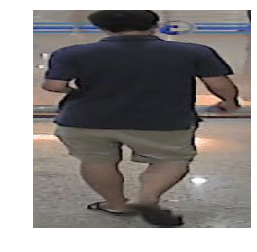

In [25]:
img = train_data[0]
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis("off")
plt.show()

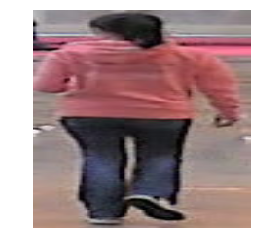

In [26]:
img = train_data[150]
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis("off")
plt.show()

In [27]:
# one-hot encoding

test_label_original = test_label
# note: run 'keras.utils.to_categorical' for only one time (no mistake-proofing)
train_label = keras.utils.to_categorical(train_label, 2)
test_label = keras.utils.to_categorical(test_label, 2)

print(train_label.shape )
print(test_label.shape )

(800, 2)
(200, 2)


In [28]:
### classification models ########################################################

In [29]:

# AlexNet
model = Sequential()
# part 1
model.add(Conv2D(filters=96, kernel_size=(11,11),
                 strides=(4,4), padding='valid',
                 input_shape=(resize,resize,3),
                 activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3), 
                       strides=(2,2), 
                       padding='valid'))
# part 2
model.add(Conv2D(filters=256, kernel_size=(5,5), 
                 strides=(1,1), padding='same', 
                 activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3), 
                       strides=(2,2), 
                       padding='valid'))
# part 3
model.add(Conv2D(filters=384, kernel_size=(3,3), 
                 strides=(1,1), padding='same', 
                 activation='relu'))
model.add(Conv2D(filters=384, kernel_size=(3,3), 
                 strides=(1,1), padding='same', 
                 activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3,3), 
                 strides=(1,1), padding='same', 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), 
                       strides=(2,2), padding='valid'))
# part 4
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(2))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 54, 54, 96)        34944     
_________________________________________________________________
batch_normalization_1 (Batch (None, 54, 54, 96)        384       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 26, 26, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 256)       614656    
_________________________________________________________________
batch_normalization_2 (Batch (None, 26, 26, 256)       1024      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 384)       885120    
__________

In [ ]:
'''
# GoogLeNet

from keras.optimizers import Adam
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten,Dropout
from keras.layers import BatchNormalization,AveragePooling2D,concatenate
from keras.layers import Input, concatenate
from keras.layers import Add
from keras.layers import GlobalAveragePooling2D
from keras.models import Model

#Define convolution with batchnromalization
def Conv2d_BN(x, nb_filter,kernel_size, padding='same',strides=(1,1),name=None):
    if name is not None:
        bn_name = name + '_bn'
        conv_name = name + '_conv'
    else:
        bn_name = None
        conv_name = None

    x = Conv2D(nb_filter,kernel_size,padding=padding,strides=strides,activation='relu',name=conv_name)(x)
    x = BatchNormalization(axis=3,name=bn_name)(x)
    return x
  
#Define Inception structure
def Inception(x,nb_filter_para):
    (branch1,branch2,branch3,branch4)= nb_filter_para
    branch1x1 = Conv2D(branch1[0],(1,1), padding='same',strides=(1,1),name=None)(x)

    branch3x3 = Conv2D(branch2[0],(1,1), padding='same',strides=(1,1),name=None)(x)
    branch3x3 = Conv2D(branch2[1],(3,3), padding='same',strides=(1,1),name=None)(branch3x3)

    branch5x5 = Conv2D(branch3[0],(1,1), padding='same',strides=(1,1),name=None)(x)
    branch5x5 = Conv2D(branch3[1],(1,1), padding='same',strides=(1,1),name=None)(branch5x5)

    branchpool = MaxPooling2D(pool_size=(3,3),strides=(1,1),padding='same')(x)
    branchpool = Conv2D(branch4[0],(1,1),padding='same',strides=(1,1),name=None)(branchpool)

    x = concatenate([branch1x1,branch3x3,branch5x5,branchpool],axis=3)

    return x
  
#Build InceptionV1 model
def InceptionV1(width, height, depth, classes):
    
    inpt = Input(shape=(width,height,depth))

    x = Conv2d_BN(inpt,64,(7,7),strides=(2,2),padding='same')
    x = MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same')(x)
    x = Conv2d_BN(x,192,(3,3),strides=(1,1),padding='same')
    x = MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same')(x)

    x = Inception(x,[(64,),(96,128),(16,32),(32,)]) #Inception 3a 28x28x256
    x = Inception(x,[(128,),(128,192),(32,96),(64,)]) #Inception 3b 28x28x480
    x = MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same')(x) #14x14x480

    x = Inception(x,[(192,),(96,208),(16,48),(64,)]) #Inception 4a 14x14x512
    x = Inception(x,[(160,),(112,224),(24,64),(64,)]) #Inception 4a 14x14x512
    x = Inception(x,[(128,),(128,256),(24,64),(64,)]) #Inception 4a 14x14x512
    x = Inception(x,[(112,),(144,288),(32,64),(64,)]) #Inception 4a 14x14x528
    x = Inception(x,[(256,),(160,320),(32,128),(128,)]) #Inception 4a 14x14x832
    x = MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same')(x) #7x7x832

    x = Inception(x,[(256,),(160,320),(32,128),(128,)]) #Inception 5a 7x7x832
    x = Inception(x,[(384,),(192,384),(48,128),(128,)]) #Inception 5b 7x7x1024

    #Using AveragePooling replace flatten
    x = AveragePooling2D(pool_size=(7,7),strides=(7,7),padding='same')(x)
    x =Flatten()(x)
    x = Dropout(0.4)(x)
    x = Dense(1000,activation='relu')(x)
    x = Dense(classes,activation='softmax')(x)
    
    model=Model(input=inpt,output=x)
    
    return model

InceptionV1_model = InceptionV1(224,224,3,2)
InceptionV1_model.summary()

InceptionV1_model.compile(optimizer=Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-08),loss = 'categorical_crossentropy',metrics=['accuracy'])

model = InceptionV1_model
'''

In [ ]:
'''
# ResNet34

from keras.optimizers import Adam
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten,Dropout
from keras.layers import BatchNormalization,AveragePooling2D,concatenate
from keras.layers import Input, concatenate
from keras.layers import Add
from keras.layers import GlobalAveragePooling2D
from keras.models import Model


#Define convolution with batchnromalization
def Conv2d_BN(x, nb_filter,kernel_size, padding='same',strides=(1,1),name=None):
    if name is not None:
        bn_name = name + '_bn'
        conv_name = name + '_conv'
    else:
        bn_name = None
        conv_name = None

    x = Conv2D(nb_filter,kernel_size,padding=padding,strides=strides,activation='relu',name=conv_name)(x)
    x = BatchNormalization(axis=3,name=bn_name)(x)
    return x
  
#Define Residual Block for ResNet34(2 convolution layers)
def Residual_Block(input_model,nb_filter,kernel_size,strides=(1,1), with_conv_shortcut =False):
    x = Conv2d_BN(input_model,nb_filter=nb_filter,kernel_size=kernel_size,strides=strides,padding='same')
    x = Conv2d_BN(x, nb_filter=nb_filter, kernel_size=kernel_size,padding='same')
    
    #need convolution on shortcut for add different channel
    if with_conv_shortcut:
        shortcut = Conv2d_BN(input_model,nb_filter=nb_filter,strides=strides,kernel_size=kernel_size)
        # x = add([x,shortcut])
        x = Add()([x, shortcut])
        return x
    else:
        x = Add()([x, input_model])
        # x = add([x,input_model])
        return x
    
#Built ResNet34
def ResNet34(width, height, depth, classes):
    
    Img = Input(shape=(width,height,depth))
    
    x = Conv2d_BN(Img,64,(7,7),strides=(2,2),padding='same')
    x = MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same')(x)  

    #Residual conv2_x ouput 56x56x64 
    x = Residual_Block(x,nb_filter=64,kernel_size=(3,3))
    x = Residual_Block(x,nb_filter=64,kernel_size=(3,3))
    x = Residual_Block(x,nb_filter=64,kernel_size=(3,3))
    
    #Residual conv3_x ouput 28x28x128 
    x = Residual_Block(x,nb_filter=128,kernel_size=(3,3),strides=(2,2),with_conv_shortcut=True)# need do convolution to add different channel
    x = Residual_Block(x,nb_filter=128,kernel_size=(3,3))
    x = Residual_Block(x,nb_filter=128,kernel_size=(3,3))
    x = Residual_Block(x,nb_filter=128,kernel_size=(3,3))
    
    #Residual conv4_x ouput 14x14x256
    x = Residual_Block(x,nb_filter=256,kernel_size=(3,3),strides=(2,2),with_conv_shortcut=True)# need do convolution to add different channel
    x = Residual_Block(x,nb_filter=256,kernel_size=(3,3))
    x = Residual_Block(x,nb_filter=256,kernel_size=(3,3))
    x = Residual_Block(x,nb_filter=256,kernel_size=(3,3))
    x = Residual_Block(x,nb_filter=256,kernel_size=(3,3))
    x = Residual_Block(x,nb_filter=256,kernel_size=(3,3))
    
    #Residual conv5_x ouput 7x7x512
    x = Residual_Block(x,nb_filter=512,kernel_size=(3,3),strides=(2,2),with_conv_shortcut=True)
    x = Residual_Block(x,nb_filter=512,kernel_size=(3,3))
    x = Residual_Block(x,nb_filter=512,kernel_size=(3,3))


    #Using AveragePooling replace flatten
    x = GlobalAveragePooling2D()(x)
    x = Dense( classes ,activation='softmax')(x)
    
    model=Model(input=Img,output=x)
    return model  

###

ResNet34_model = ResNet34(224,224,3,2)

ResNet34_model.summary()
ResNet34_model.compile(optimizer=Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-08),loss = 'categorical_crossentropy',metrics=['accuracy'])

model = ResNet34_model
'''

In [ ]:
'''
# VGG (VGG16Net)

from keras.optimizers import Adam

def VGG16Net(width, height, depth, classes):
    
    model = Sequential()
    
    model.add(Conv2D(64,(3,3),strides=(1,1),input_shape=(224,224,3),padding='same',activation='relu'))
    model.add(Conv2D(64,(3,3),strides=(1,1),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(128,(3,2),strides=(1,1),padding='same',activation='relu'))
    model.add(Conv2D(128,(3,3),strides=(1,1),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu'))
    model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu'))
    model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(512,(3,3),strides=(1,1),padding='same',activation='relu'))
    model.add(Conv2D(512,(3,3),strides=(1,1),padding='same',activation='relu'))
    model.add(Conv2D(512,(3,3),strides=(1,1),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(512,(3,3),strides=(1,1),padding='same',activation='relu'))
    model.add(Conv2D(512,(3,3),strides=(1,1),padding='same',activation='relu'))
    model.add(Conv2D(512,(3,3),strides=(1,1),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(4096,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1000,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense( classes ,activation='softmax'))
    
    return model
  
# VGG16_model = VGG16Net(224,224,3,17)
VGG16_model = VGG16Net(224,224,3,2)

VGG16_model.summary()
VGG16_model.compile(optimizer=Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-08),loss = 'categorical_crossentropy',metrics=['accuracy'])

model = VGG16_model
'''

In [30]:
# save model (by using callbacks)
from keras.callbacks import ModelCheckpoint
callbacks = [ModelCheckpoint('model.h16', monitor='val_acc', save_best_only=True)] # record best model every epoch

In [31]:
train_history = model.fit(train_data, train_label,
                          batch_size = 128,
                          epochs = 10,
                          validation_split = 0.2,
                          shuffle = True, 
                          callbacks=callbacks)

Train on 640 samples, validate on 160 samples
Epoch 1/10
640/640 [==============================] - 66s 104ms/step - loss: 1.3818 - acc: 0.5281 - val_loss: 0.6065 - val_acc: 0.7562
Epoch 2/10
640/640 [==============================] - 70s 110ms/step - loss: 0.6091 - acc: 0.6547 - val_loss: 0.5569 - val_acc: 0.8125
Epoch 3/10
640/640 [==============================] - 70s 109ms/step - loss: 0.5782 - acc: 0.6937 - val_loss: 0.5963 - val_acc: 0.7125
Epoch 4/10
640/640 [==============================] - 65s 102ms/step - loss: 0.5394 - acc: 0.6937 - val_loss: 0.6602 - val_acc: 0.6562
Epoch 5/10
640/640 [==============================] - 65s 101ms/step - loss: 0.4662 - acc: 0.7578 - val_loss: 0.5115 - val_acc: 0.7875
Epoch 6/10
640/640 [==============================] - 66s 103ms/step - loss: 0.4543 - acc: 0.7609 - val_loss: 0.5092 - val_acc: 0.7562
Epoch 7/10
640/640 [==============================] - 64s 101ms/step - loss: 0.4319 - acc: 0.7750 - val_loss: 0.7683 - val_acc: 0.6250
Epoch 8/1

In [32]:
import matplotlib.pyplot as pyplot
def my_show_train_history(input_train_history, input_train, input_validation):
    pyplot.plot(input_train_history.history[input_train] )
    pyplot.plot(input_train_history.history[input_validation])
    pyplot.title('Train History')
    pyplot.ylabel(input_train)
    # pyplot.ylabel('Accuracy')
    pyplot.xlabel('Epoch')
    pyplot.legend(['my_train','my_validation'], loc='upper left')
    pyplot.show()

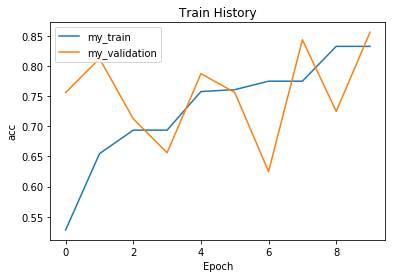

In [33]:
my_show_train_history( train_history, 'acc', 'val_acc' )


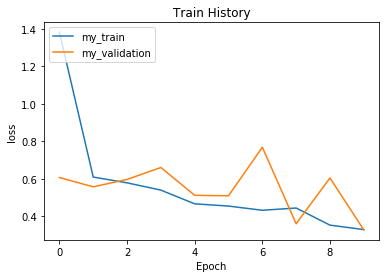

In [34]:
my_show_train_history( train_history, 'loss', 'val_loss' )


In [35]:
score, acc = model.evaluate(train_data, train_label, verbose=1)
print('Train score:', score) # loss function
print('Train accuracy:', acc) # accuracy

800/800 [==============================] - 19s 23ms/step
Train score: 0.26115445902571083
Train accuracy: 0.8975


In [36]:
score, acc = model.evaluate(test_data, test_label, verbose=1)
print('Test score:', score) # loss function
print('Test accuracy:', acc) # accuracy

200/200 [==============================] - 5s 23ms/step
Test score: 0.3146221709251404
Test accuracy: 0.865


In [37]:
# predict = model.predict_classes(test_data)

import numpy as np
predict = model.predict(test_data)
predict = np.argmax(predict,axis=1)

In [38]:
predict[:1000]

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0], dtype=int64)

In [39]:
# reshape
predict_classes = predict.reshape(-1)
predict_classes[:1000]

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0], dtype=int64)

In [40]:
print(test_label_original[:1000])

[1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 0 0 1
 1 1 0 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1
 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0]


In [41]:
from sklearn.metrics import classification_report
print(classification_report(test_label_original, predict_classes, digits=4))

              precision    recall  f1-score   support

           0     0.8763    0.8500    0.8629       100
           1     0.8544    0.8800    0.8670       100

   micro avg     0.8650    0.8650    0.8650       200
   macro avg     0.8653    0.8650    0.8650       200
weighted avg     0.8653    0.8650    0.8650       200



In [42]:
import pandas as pd
pd.crosstab(test_label_original, predict_classes, rownames=['label'], colnames=['predict'])

predict,0,1
label,,
0,85,15
1,12,88


In [50]:
dictionary = {1:'male', 0:'female'}
def display_test(i):
    print('ground truth:', dictionary[ test_label_original[i] ] ) 
    print('predicted result:', dictionary[ predict_classes[i] ] )

In [51]:
display_test(0)

ground truth: male
predicted result: male


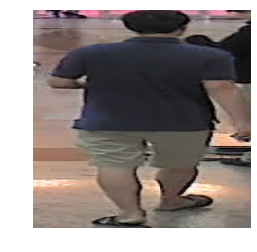

In [52]:
img = test_data[0]
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis("off")
plt.show()

In [59]:
display_test(41)

ground truth: female
predicted result: male


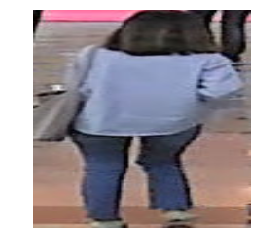

In [60]:
img = test_data[41]
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis("off")
plt.show()